<a href="https://colab.research.google.com/github/EnergeticQuanta17/testing/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip
!unzip datasetb2d9982.zip -d dataset

--2023-04-21 13:11:47--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.128.50
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.128.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 895569552 (854M) [binary/octet-stream]
Saving to: ‘datasetb2d9982.zip’

datasetb2d9982.zip  100%[===================>] 854.08M  95.5MB/s    in 8.9s    

2023-04-21 13:11:56 (95.6 MB/s) - ‘datasetb2d9982.zip’ saved [895569552/895569552]

Archive:  datasetb2d9982.zip
   creating: dataset/dataset/
  inflating: dataset/dataset/sample_submission.csv  
  inflating: dataset/dataset/train.csv  
  inflating: dataset/dataset/test.csv  


In [1]:
!ls dataset/dataset

sample_submission.csv  test.csv  train.csv


In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('dataset/dataset/train.csv', nrows=100)

In [4]:
full_train_df = pd.read_csv('dataset/dataset/train.csv')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

Length of sentence for each TITLE

In [6]:
full_train_df.fillna('', inplace=True)

In [24]:
word_lengths = [len(full_train_df.loc[i]['TITLE']) for i in range(len(full_train_df))]

In [25]:
len(word_lengths)

2249698

# Histogram on len(TITLE)
Using Freedman-Diaconis rule to find the optimal number of bins for a histogram

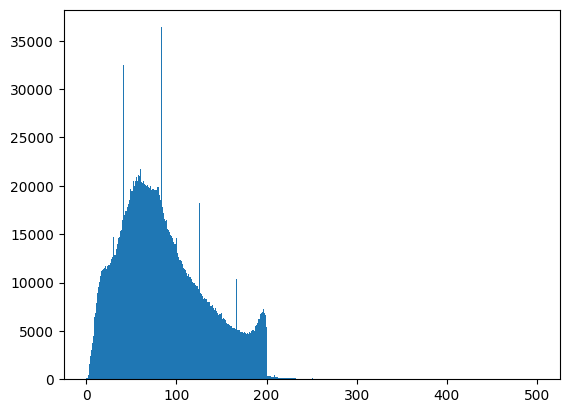

In [26]:
import numpy as np
q1, q3 = np.percentile(word_lengths, [25, 75])
iqr = q3 - q1
bin_width = 2 * iqr / (len(word_lengths) ** (1/3))

# calculate number of bins
max_val, min_val = np.max(word_lengths), np.min(word_lengths)
num_bins = int((max_val - min_val) / bin_width)

# plot histogram
import matplotlib.pyplot as plt
plt.hist(word_lengths, bins=num_bins)
plt.show()

Histogram given the Column Name

In [10]:
import numpy as np
def histogram_given_column(df, col_name):
    print(df[col_name].dtype.kind)
    if(df[col_name].dtype.kind not in ['i', 'O', 'f']):
        word_lengths = [len(df.loc[i][col_name]) for i in range(len(df))]
    else:
        word_lengths = df[col_name]
    
    q1, q3 = np.percentile(word_lengths, [25, 75])
    iqr = q3 - q1
    bin_width = 2 * iqr / (len(word_lengths) ** (1/3))

    # calculate number of bins
    max_val, min_val = np.max(word_lengths), np.min(word_lengths)
    num_bins = int((max_val - min_val) / bin_width)

    # plot histogram
    import matplotlib.pyplot as plt
    plt.hist(word_lengths, bins=num_bins)
    plt.show()

In [11]:
train_df.columns

Index(['PRODUCT_ID', 'TITLE', 'BULLET_POINTS', 'DESCRIPTION',
       'PRODUCT_TYPE_ID', 'PRODUCT_LENGTH'],
      dtype='object')

In [ ]:
histogram_given_column(full_train_df, 'PRODUCT_LENGTH')

f


Number of NAN values in Columns

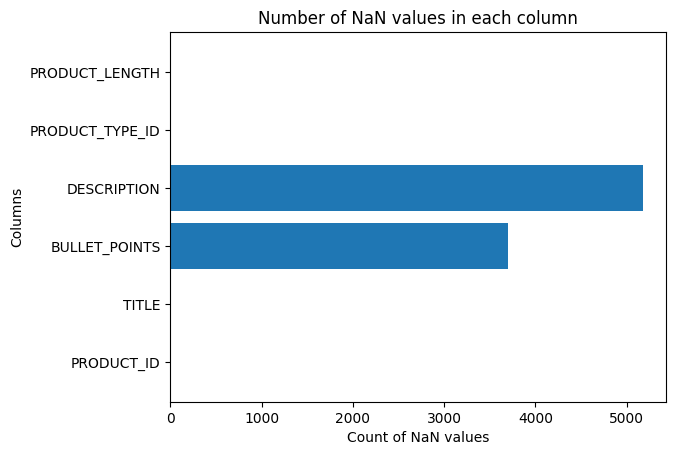

In [14]:
nan_counts = full_train_df.isna().sum()
plt.barh(nan_counts.index, nan_counts.values)
plt.title('Number of NaN values in each column')
plt.xlabel('Count of NaN values')
plt.ylabel('Columns')
plt.show()

In [16]:
nan_counts

PRODUCT_ID            0
TITLE                 0
BULLET_POINTS      3700
DESCRIPTION        5176
PRODUCT_TYPE_ID       0
PRODUCT_LENGTH        0
dtype: int64